In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

def unzip_file(zip_path, extract_to):
    """Unzips a file and returns a list of extracted files."""
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_to)
    return os.listdir(extract_to)

In [ ]:
!cp drive/MyDrive/faces.zip ./
!cp drive/MyDrive/cat_and_dog-1.zip ./


In [ ]:

# Unzip the main dataset folders

unzip_file("cat_and_dog-1.zip", "cats_dogs")
unzip_file("faces.zip", "human_faces")

# Unzip the inner zip files
cats_dogs_inner = ["cats_dogs/cat_face.zip", "cats_dogs/dog faces.zip"]

for file in cats_dogs_inner:
    unzip_file(file, "cats_dogs")



In [ ]:
import os
import shutil
import random

# Source directories and destination folder
source_dirs = [
    "cats_dogs/train",
    "cats_dogs/Cat-faces-dataset-master/dataset-part1/dataset-part1",
    "cats_dogs/Cat-faces-dataset-master/dataset-part2/dataset-part2",
    "cats_dogs/Cat-faces-dataset-master/dataset-part3/dataset-part3"
]
dest_dir = "cyclegan/animals"

os.makedirs(dest_dir, exist_ok=True)

# Collect all image paths
images = [os.path.join(root, f)
          for src in source_dirs
          for root, _, files in os.walk(src)
          for f in files if f.lower().endswith((".jpg", ".jpeg", ".png"))]

# Shuffle and select up to 2000 images
random.shuffle(images)
selected_images = images[:min(2000, len(images))]

# Copy images with unique names
for img in selected_images:
    folder = os.path.basename(os.path.dirname(img))  # Get parent folder name
    shutil.copy(img, os.path.join(dest_dir, f"{folder}_{os.path.basename(img)}"))

print(f"Copied {len(selected_images)} images to {dest_dir}.")


Copied 2000 images to cyclegan/animals.


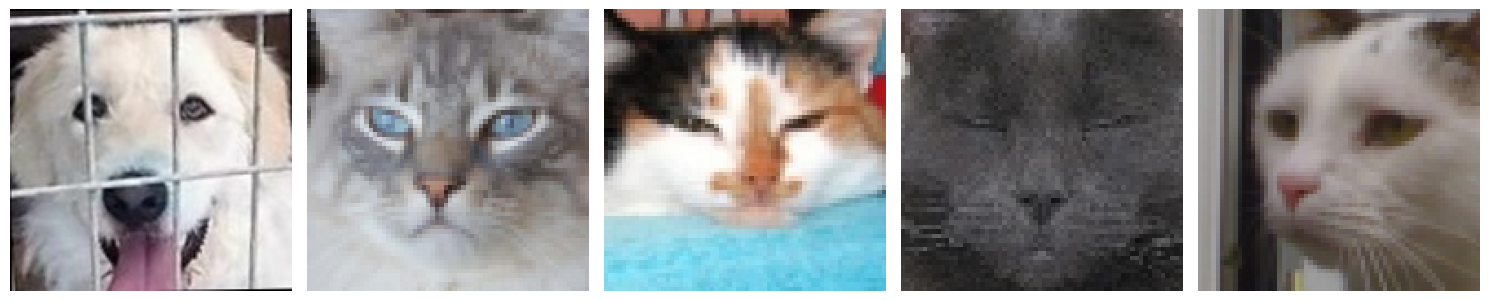

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Display 5 random images from the 'cyclegan/animals' folder
image_dir = "cyclegan/animals"
selected_images = random.sample([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))], 5)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax, img_path in zip(axes, selected_images):
    ax.imshow(Image.open(img_path))
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import os
import random
import shutil

# Source directories and destination folder
source_dirs = ["human_faces/faces/utkcropped/", "human_faces/faces/img_align_celeba"]
dest_dir = "cyclegan/humans"

os.makedirs(dest_dir, exist_ok=True)

# Collect all image paths
images = [os.path.join(root, f)
          for src in source_dirs for root, _, files in os.walk(src)
          for f in files if f.lower().endswith((".jpg", ".jpeg", ".png"))]

# Shuffle and select 2000 images (or all if less)
random.shuffle(images)
selected_images = images[:min(2000, len(images))]

# Copy images with unique names
for img in selected_images:
    folder = os.path.basename(os.path.dirname(img))  # Get parent folder name
    shutil.copy(img, os.path.join(dest_dir, f"{folder}_{os.path.basename(img)}"))

print(f"Copied {len(selected_images)} images to {dest_dir}.")


Copied 2000 images to cyclegan/humans.


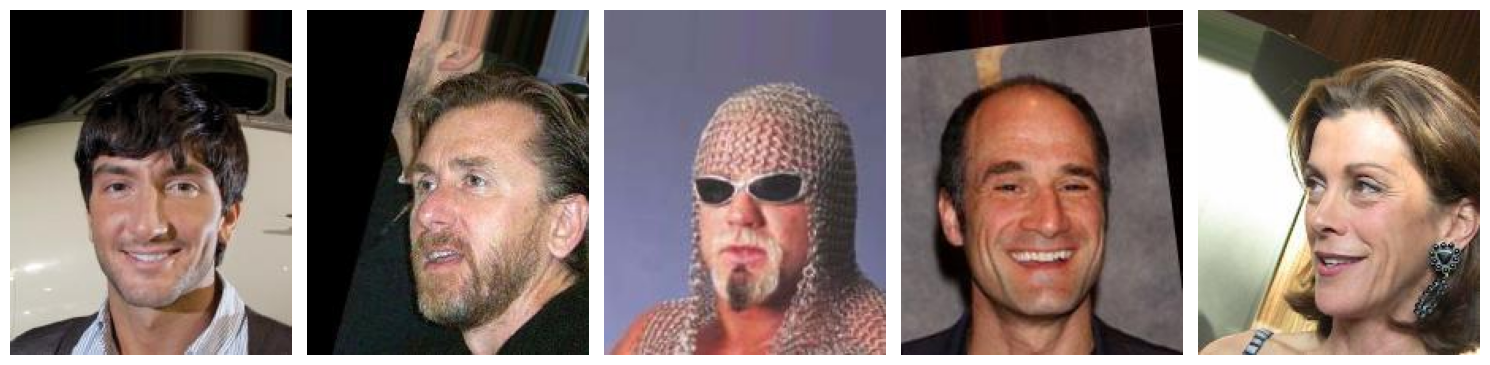

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Display 5 random images from the 'cyclegan/animals' folder
image_dir = "cyclegan/humans"
selected_images = random.sample([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))], 5)

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax, img_path in zip(axes, selected_images):
    ax.imshow(Image.open(img_path))
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import os
from PIL import Image

# Define source and destination folders
src_humans = "/content/cyclegan/humans"
src_animals = "/content/cyclegan/animals"
dst_trainA = "datasets/humans2animals/trainA"
dst_trainB = "datasets/humans2animals/trainB"

# Ensure destination folders exist
os.makedirs(dst_trainA, exist_ok=True)
os.makedirs(dst_trainB, exist_ok=True)

# Resize and move function
def resize_and_move(src_folder, dst_folder):
    if not os.path.exists(src_folder):
        print(f"Source folder not found: {src_folder}")
        return

    files = [f for f in os.listdir(src_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not files:
        print(f"No images found in {src_folder}")
        return

    for file in files:
        src_path = os.path.join(src_folder, file)
        dst_path = os.path.join(dst_folder, file)

        try:
            img = Image.open(src_path).convert("RGB")  # Convert to RGB
            img = img.resize((128, 128), Image.BICUBIC)

            img.save(dst_path, "JPEG")  # Saves as JPEG
            print(f"Resized & moved: {file} → {dst_folder}")

        except Exception as e:
            print(f"Error processing {file}: {e}")

# Process images
resize_and_move(src_humans, dst_trainA)
resize_and_move(src_animals, dst_trainB)

print("\n All images resized to 128x128 and moved successfully!")


Resized & moved: img_align_celeba_042170.jpg → datasets/humans2animals/trainA
Resized & moved: img_align_celeba_142722.jpg → datasets/humans2animals/trainA
Resized & moved: img_align_celeba_189302.jpg → datasets/humans2animals/trainA
Resized & moved: utkcropped_25_1_0_20170116223905448.jpg.chip.jpg → datasets/humans2animals/trainA
Resized & moved: img_align_celeba_114640.jpg → datasets/humans2animals/trainA
Resized & moved: img_align_celeba_153447.jpg → datasets/humans2animals/trainA
Resized & moved: img_align_celeba_071255.jpg → datasets/humans2animals/trainA
Resized & moved: utkcropped_17_0_0_20170110231615651.jpg.chip.jpg → datasets/humans2animals/trainA
Resized & moved: img_align_celeba_140480.jpg → datasets/humans2animals/trainA
Resized & moved: img_align_celeba_202505.jpg → datasets/humans2animals/trainA
Resized & moved: img_align_celeba_109109.jpg → datasets/humans2animals/trainA
Resized & moved: img_align_celeba_158885.jpg → datasets/humans2animals/trainA
Resized & moved: img_a

In [ ]:
# Install necessary dependencies for CycleGAN (PyTorch version)
!pip install torch torchvision
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
%cd pytorch-CycleGAN-and-pix2pix
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
#Train cyclegan
!python train.py --dataroot /content/datasets/humans2animals \
    --name human2animal_cyclegan --model cycle_gan \
    --n_epochs 30 --n_epochs_decay 30 --batch_size 6 --lr 0.0002 \
    --pool_size 50 --save_epoch_freq 5 --gpu_ids 0 \
    --lambda_identity 0.5 --lr_policy linear \
    --preprocess resize_and_crop --load_size 128 --crop_size 128


----------------- Options ---------------
               batch_size: 6                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 128                           	[default: 256]
                 dataroot: /content/datasets/humans2animals	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest         

In [ ]:
!ls /content/pytorch-CycleGAN-and-pix2pix/checkpoints/human2animal_cyclegan/


10_net_D_A.pth	20_net_G_B.pth	35_net_G_A.pth	50_net_D_B.pth	60_net_D_A.pth
10_net_D_B.pth	25_net_D_A.pth	35_net_G_B.pth	50_net_G_A.pth	60_net_D_B.pth
10_net_G_A.pth	25_net_D_B.pth	40_net_D_A.pth	50_net_G_B.pth	60_net_G_A.pth
10_net_G_B.pth	25_net_G_A.pth	40_net_D_B.pth	55_net_D_A.pth	60_net_G_B.pth
15_net_D_A.pth	25_net_G_B.pth	40_net_G_A.pth	55_net_D_B.pth	latest_net_D_A.pth
15_net_D_B.pth	30_net_D_A.pth	40_net_G_B.pth	55_net_G_A.pth	latest_net_D_B.pth
15_net_G_A.pth	30_net_D_B.pth	45_net_D_A.pth	55_net_G_B.pth	latest_net_G_A.pth
15_net_G_B.pth	30_net_G_A.pth	45_net_D_B.pth	5_net_D_A.pth	latest_net_G_B.pth
20_net_D_A.pth	30_net_G_B.pth	45_net_G_A.pth	5_net_D_B.pth	loss_log.txt
20_net_D_B.pth	35_net_D_A.pth	45_net_G_B.pth	5_net_G_A.pth	train_opt.txt
20_net_G_A.pth	35_net_D_B.pth	50_net_D_A.pth	5_net_G_B.pth	web


In [ ]:
# Test the model
# Here I used different images in my drive to test cyclegan
!python test.py --dataroot /content/drive/MyDrive/Test_set --name human2animal_cyclegan --model cycle_gan --no_dropout --gpu_ids 0 --results_dir /content/drive/MyDrive/CycleGAN_Test_Results


In [ ]:
!ls /content/drive/MyDrive/CycleGAN_Test_Results/human2animal_cyclegan/test_latest/images


hermonie_fake_A.png  hermonie_real_A.png  hermonie_rec_A.png
hermonie_fake_B.png  hermonie_real_B.png  hermonie_rec_B.png


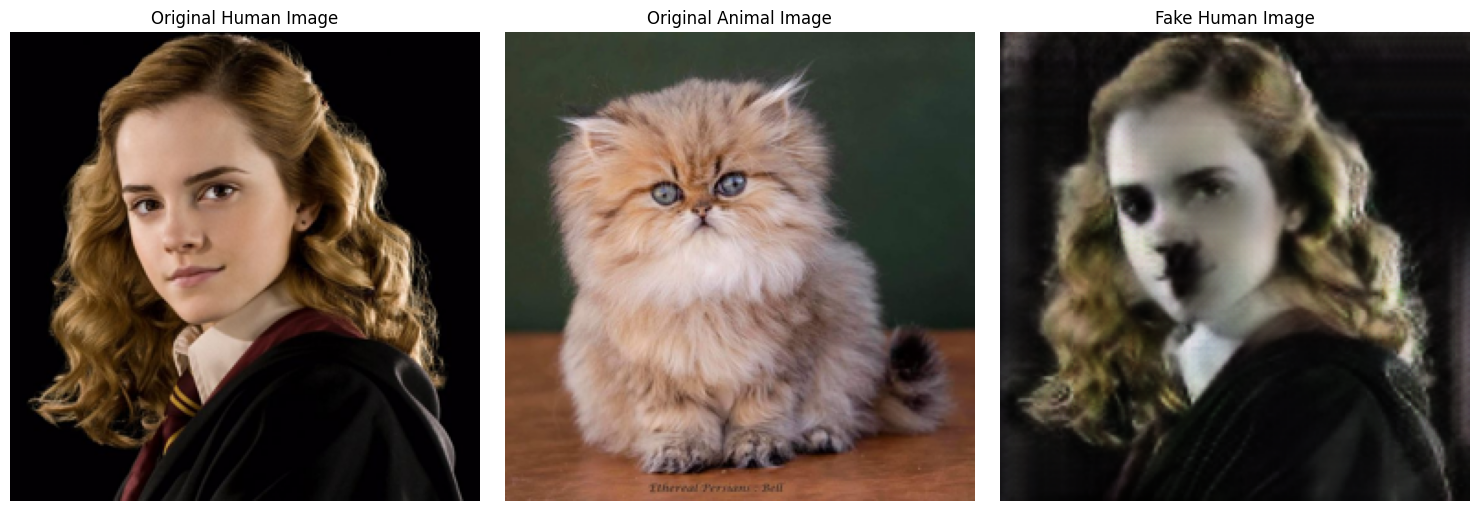

In [ ]:
# Results
import matplotlib.pyplot as plt
from PIL import Image

# Define image paths
image_path1 = "/content/drive/MyDrive/CycleGAN_Test_Results/human2animal_cyclegan/test_latest/images/hermonie_real_A.png"  # Original Human Image
image_path2 = "/content/drive/MyDrive/CycleGAN_Test_Results/human2animal_cyclegan/test_latest/images/hermonie_real_B.png"  # Original Animal Image
image_path3 = "/content/drive/MyDrive/CycleGAN_Test_Results/human2animal_cyclegan/test_latest/images/hermonie_fake_B.png"  # Fake Human Image

img1 = Image.open(image_path1)
img2 = Image.open(image_path2)
img3 = Image.open(image_path3)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img1)
axes[0].axis("off")
axes[0].set_title("Original Human Image")

axes[1].imshow(img2)
axes[1].axis("off")
axes[1].set_title("Original Animal Image")

axes[2].imshow(img3)
axes[2].axis("off")
axes[2].set_title("Fake Human Image")

plt.tight_layout()
plt.show()


In [ ]:
!zip -r /content/checkpoints.zip /content/pytorch-CycleGAN-and-pix2pix/checkpoints/human2animal_cyclegan


  adding: content/pytorch-CycleGAN-and-pix2pix/checkpoints/human2animal_cyclegan/ (stored 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/checkpoints/human2animal_cyclegan/55_net_D_A.pth (deflated 7%)
  adding: content/pytorch-CycleGAN-and-pix2pix/checkpoints/human2animal_cyclegan/10_net_G_A.pth (deflated 7%)
  adding: content/pytorch-CycleGAN-and-pix2pix/checkpoints/human2animal_cyclegan/10_net_D_B.pth (deflated 7%)
  adding: content/pytorch-CycleGAN-and-pix2pix/checkpoints/human2animal_cyclegan/25_net_G_B.pth (deflated 7%)
  adding: content/pytorch-CycleGAN-and-pix2pix/checkpoints/human2animal_cyclegan/55_net_G_A.pth (deflated 7%)
  adding: content/pytorch-CycleGAN-and-pix2pix/checkpoints/human2animal_cyclegan/50_net_D_A.pth (deflated 7%)
  adding: content/pytorch-CycleGAN-and-pix2pix/checkpoints/human2animal_cyclegan/40_net_D_A.pth (deflated 7%)
  adding: content/pytorch-CycleGAN-and-pix2pix/checkpoints/human2animal_cyclegan/5_net_D_B.pth (deflated 7%)
  adding: content/pytorch-C

#**Report**

#Achievements :

*   Organized images into two categories: human faces and animal faces.
*   Selected 2000 images randomly for each category.

*   Resized and standardized image dimensions to 128x128 pixels for efficient model training.

*   Trained CycleGAN for 60 epochs (30 epochs standard + 30 epochs decay) with a learning rate of 0.0002 and a batch size of 6.
*   Tested the model using 2 images.


*  Visualized results with matplotlib to compare original and generated images.


